## Importing the libraries and reading the data

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import sklearn.metrics
import seaborn as sn
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


sn.set_theme(color_codes=True)

df = pd.read_excel('data.xlsx')
df

,program_id,program_city_group,age_group,gender_group,service_type_id,distance_min,cpr_max,cpr_mean,cpr_median,cpr_std,...,visit_neur_avg_min,visit_neuro_avg_max,visit_neuro_avg_mean,visit_neuro_avg_min,visit_oft_avg_max,visit_oft_avg_mean,visit_oft_avg_min,visit_surg_avg_max,visit_surg_avg_mean,visit_surg_avg_min
0,1358,2.0,age_group_1,NaN,1,NaN,1.687585,1.687585,1.687585,NaN,...,8.25,1.8,1.800000,1.80,1.80,1.60000,1.40,1.80,8.590000,6.38
1,1358,2.0,age_group_1,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1358,2.0,age_group_1,1.0,1,NaN,1.975258,1.355735,0.652630,0.818169,...,8.25,1.8,1.800000,1.80,1.80,1.60000,1.40,1.80,8.590000,6.38
3,1358,2.0,age_group_1,1.0,2,NaN,3.741448,3.485539,3.485539,0.361910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,811,2.0,age_group_1,1.0,1,NaN,1.647994,1.861750,1.227380,0.348698,...,2.50,6.5,4.911500,4.00,12.50,6.13715,3.50,6.50,5.144165,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,1918,2.0,age_group_1,NaN,1,NaN,2.146535,1.285100,1.358695,0.837112,...,5.50,9.9,8.272725,7.00,1.70,8.53555,6.25,9.75,7.591665,5.50
5043,1918,2.0,age_group_1,NaN,2,NaN,3.495655,3.495655,3.495655,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5044,7794,NaN,age_group_1,NaN,2,NaN,2.212645,2.212645,2.212645,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5045,1115,NaN,age_group_1,1.0,1,NaN,6.611755,3.516150,3.339455,1.383525,...,4.90,49.9,1.985415,5.81,25.25,9.99740,5.00,37.45,9.727710,5.25


## Number of unique values

In [2]:
df.nunique()

program_id             1694
program_city_group        2
age_group                 2
gender_group              1
service_type_id           2
                       ... 
visit_oft_avg_mean      423
visit_oft_avg_min        83
visit_surg_avg_max       81
visit_surg_avg_mean     406
visit_surg_avg_min       65
Length: 87, dtype: int64

In [3]:
df.clinic_franchise.unique()

array([nan,  1.,  2.,  3.])

In [4]:
df.program_city_group.unique()

array([ 2., nan,  1.])

In [5]:
df.age_group.unique()

array(['age_group_1', 'age_group_2'], dtype=object)

In [6]:
df.gender_group.unique()

array([nan,  1.])

The dataset has 5047 rows and 87 columns.

In [7]:
# Replacing some of NaNs with numerical values in the case when they are meaningful.

df['clinic_franchise'] = df['clinic_franchise'].fillna(0)
df['program_city_group'] = df['program_city_group'].fillna(1)
df['gender_group'] = df['gender_group'].fillna(2)

## Feature engineering

In [8]:
# Label encoding is used to transform non-numerical labels to numerical.

le = preprocessing.LabelEncoder()
df['program_city_group'] = le.fit_transform(df.program_city_group.values)
df['age_group'] = le.fit_transform(df.age_group.values)
df['gender_group'] = le.fit_transform(df.gender_group.values)
df['clinic_franchise'] = le.fit_transform(df.clinic_franchise.values)

In [9]:
df.target = pd.to_numeric(df.target, errors='coerce')
df.dropna(axis=0, inplace=True, how='all')
df = df[df['target'].notna()]

## EDA

In [10]:
# Analysing the number of missing values (NaNs) for each predictor.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5028 entries, 0 to 5046
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   program_id                   5028 non-null   int64  
 1   program_city_group           5028 non-null   int64  
 2   age_group                    5028 non-null   int64  
 3   gender_group                 5028 non-null   int64  
 4   service_type_id              5028 non-null   int64  
 5   distance_min                 2828 non-null   float64
 6   cpr_max                      3810 non-null   float64
 7   cpr_mean                     3810 non-null   float64
 8   cpr_median                   3810 non-null   float64
 9   cpr_std                      2601 non-null   float64
 10  cpr_min                      3810 non-null   float64
 11  cpr_region                   5028 non-null   float64
 12  number_of_clinics_in_progam  5028 non-null   int64  
 13  clinic_franchise  

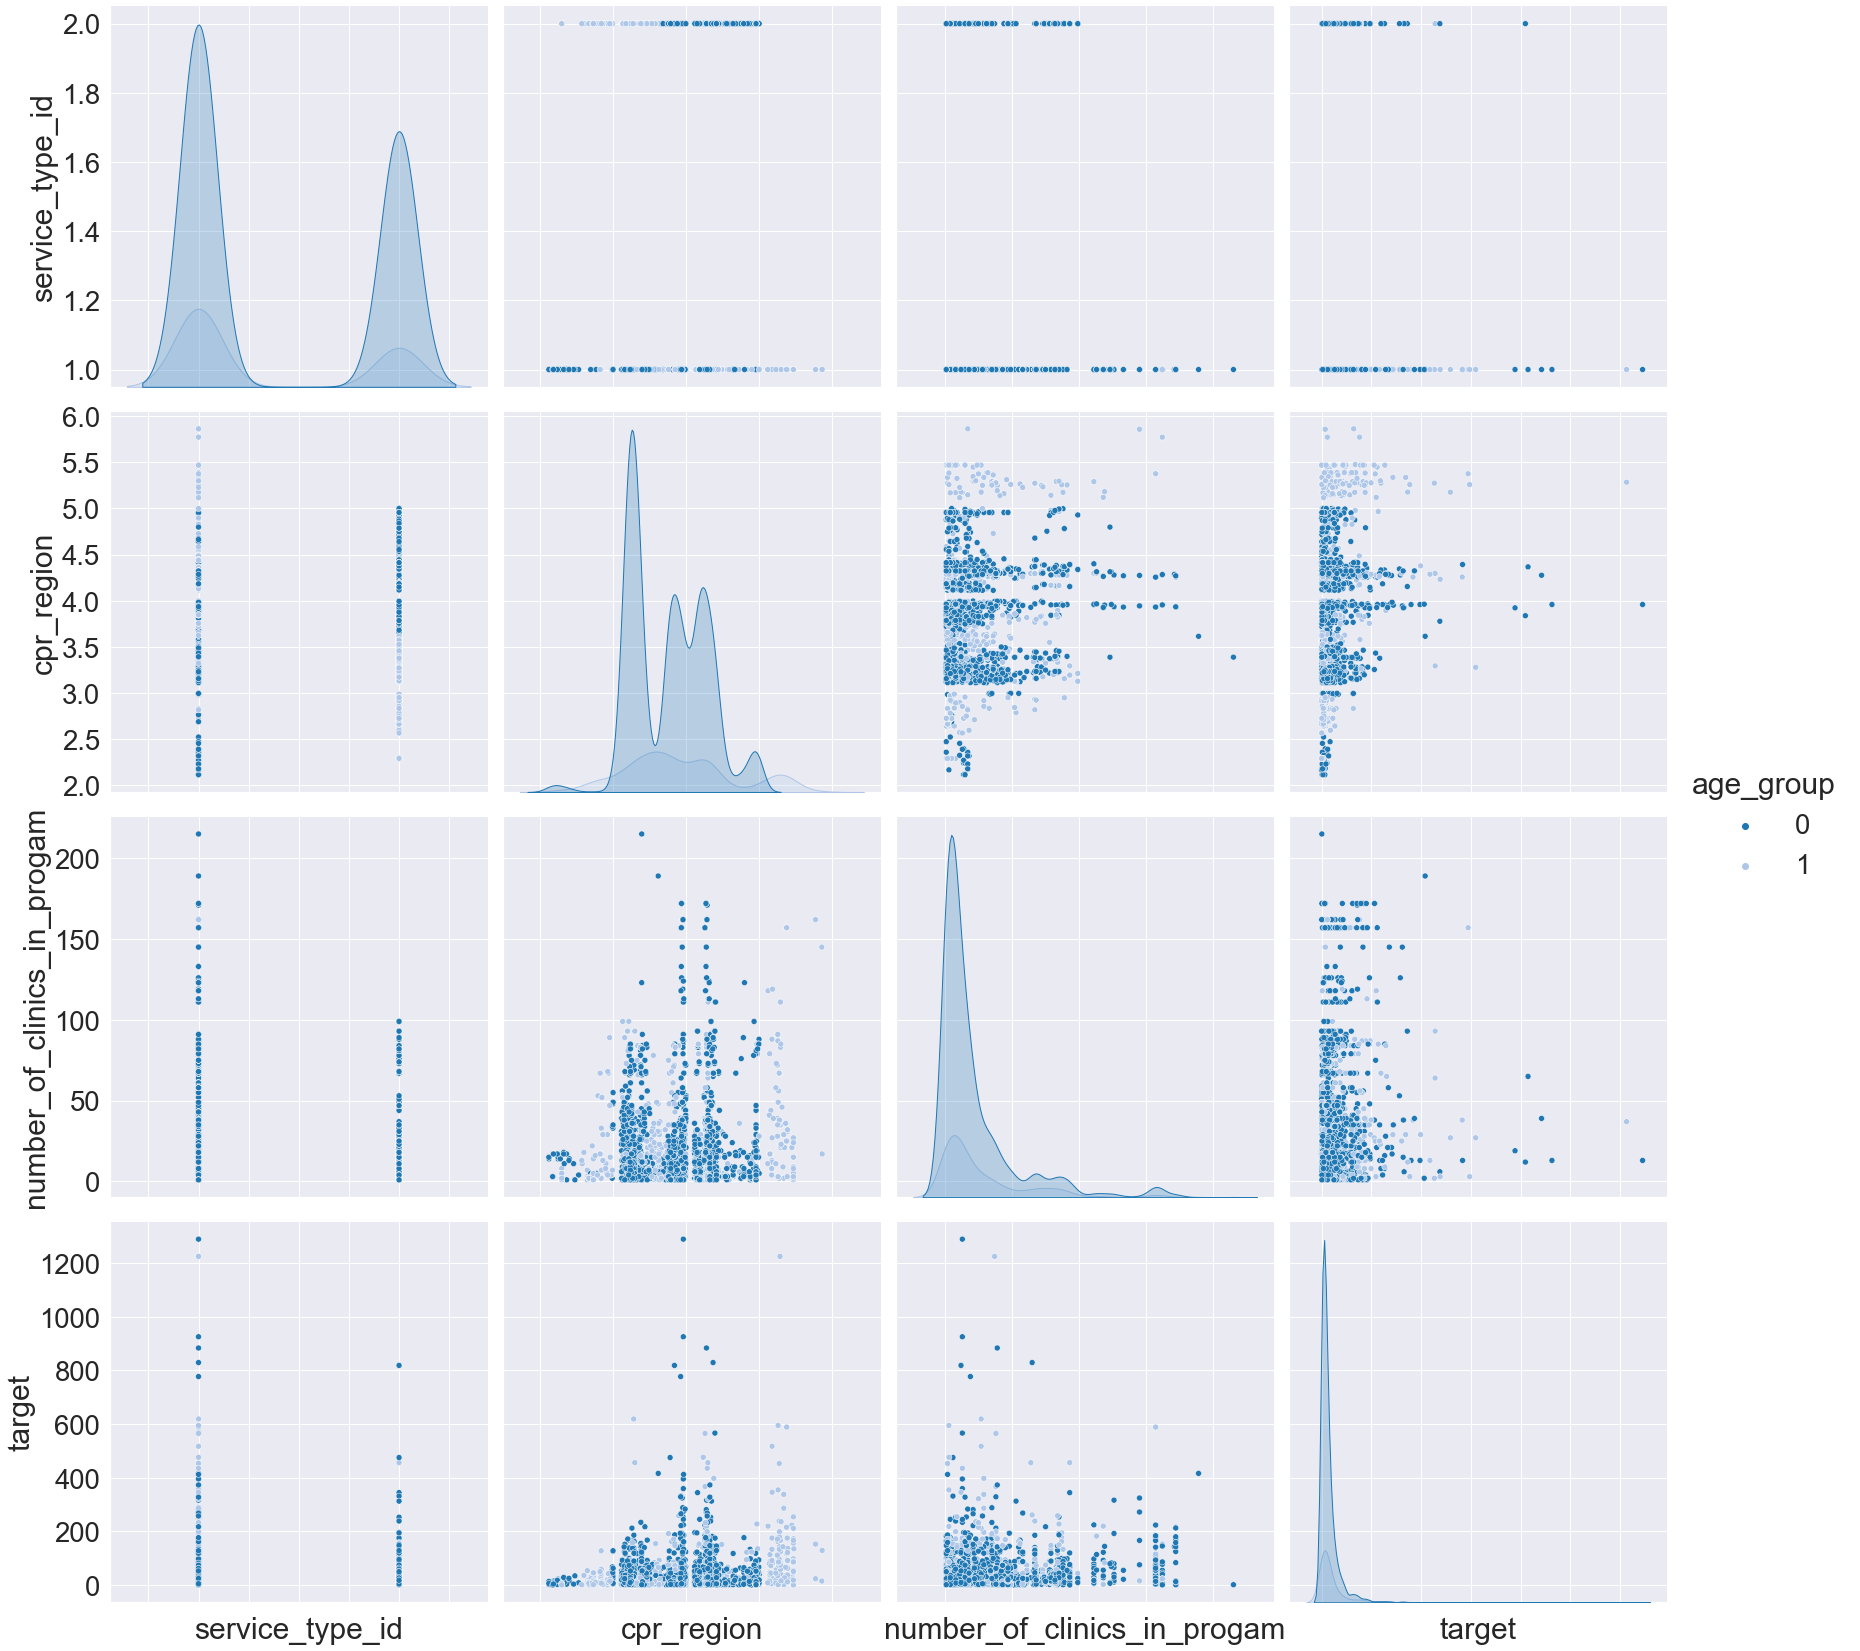

In [11]:
with sn.plotting_context('notebook',font_scale=2.5):
    g = sn.pairplot(df[['service_type_id', 'cpr_region', 'number_of_clinics_in_progam','target','age_group']], 
                 hue='age_group', palette='tab20', height=6)
g.set(xticklabels=[]);

## Correlation analysis

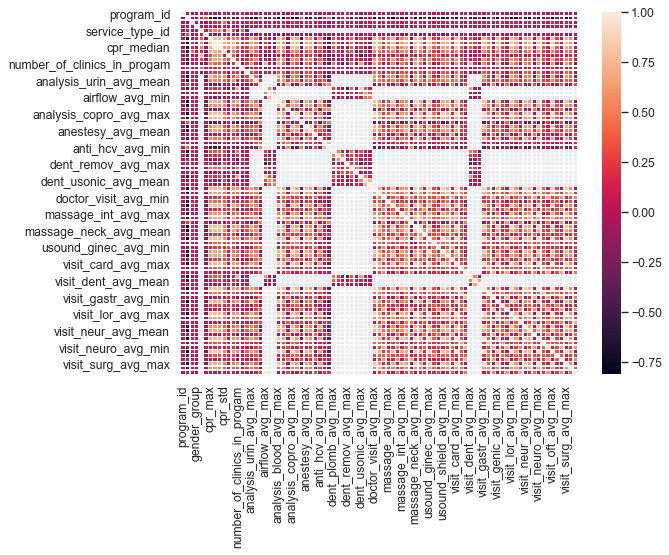

In [12]:
figure(figsize=(8, 6), dpi=80)
corrMatrix = df.corr()
sn.heatmap(corrMatrix, linewidths=0.3)
plt.show()

## Target analysis

<AxesSubplot:xlabel='target', ylabel='Count'>

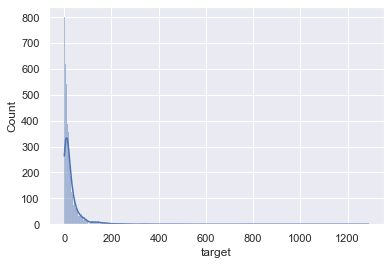

In [13]:
sn.histplot(data=df, x='target', kde=True)

<AxesSubplot:xlabel='target', ylabel='Count'>

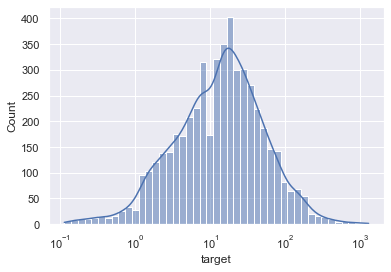

In [14]:
sn.histplot(data=df, x='target', kde=True, log_scale=True)

In [15]:
print('The mean value for target is {:.3f}, 99% of clients have {:.3f} or less, and the highest value recorded is {:.3f}.'.format(df['target'].mean(),df['target'].quantile(0.99), df['target'].max()))

The mean value for target is 30.377, 99% of clients have 253.477 or less, and the highest value recorded is 1289.633.


## Baseline linear regression

In [16]:
predictors = ['program_id', 'program_city_group', 'age_group', 'gender_group',
       'service_type_id', 'cpr_region', 'number_of_clinics_in_progam',
       'clinic_franchise']

df1 = df[predictors + ['target']]

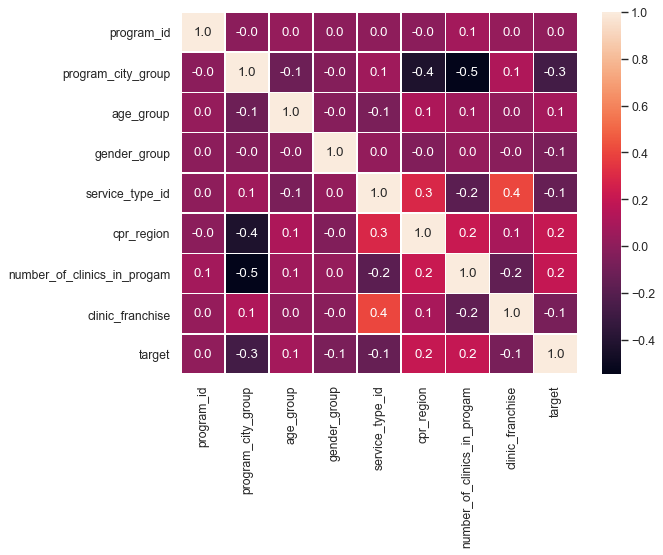

In [17]:
corrMatrix = df1.corr()
figure(figsize=(8, 6), dpi=80)
sn.heatmap(corrMatrix, annot=True, linewidths=.5, fmt= '.1f')
plt.show()

In [18]:
linear_regression = LinearRegression()

X = df1[predictors]
y = df1.target

scores = cross_validate(linear_regression, X, y, cv=5, scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'])

print('Used predictors for linear regression are:', *predictors)

print('MSE:', '{:.4f}'.format(-scores['test_neg_mean_squared_error'].mean()))
print('RMSE:', '{:.4f}'.format(-scores['test_neg_root_mean_squared_error'].mean()))
print('MAPE:', '{:.4f}'.format(-scores['test_neg_mean_absolute_percentage_error'].mean()))

Used predictors for linear regression are: program_id program_city_group age_group gender_group service_type_id cpr_region number_of_clinics_in_progam clinic_franchise
MSE: 3201.4329
RMSE: 54.5436
MAPE: 5.3556


<AxesSubplot:ylabel='target'>

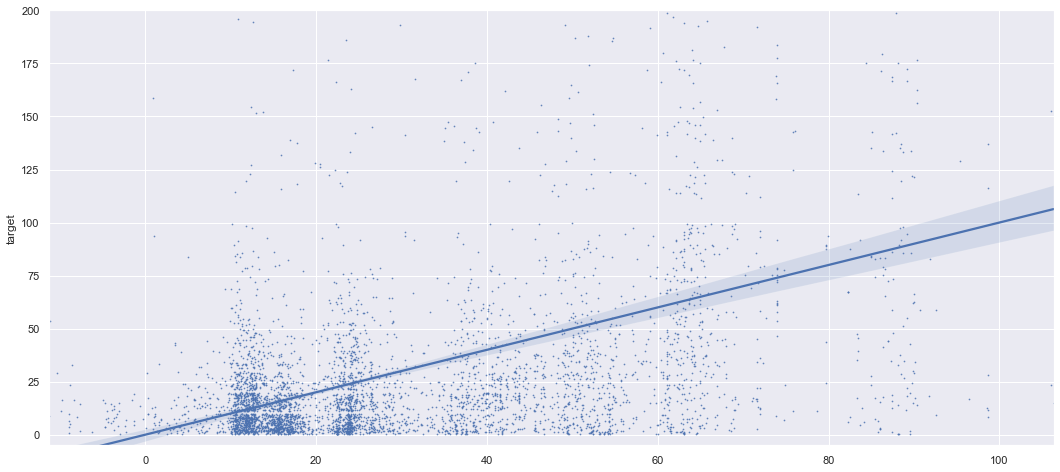

In [19]:
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

plt.rcParams["figure.figsize"] = (18,8)
plt.ylim(-5, 200)
sn.regplot(x=y_pred, y=y, scatter_kws={'s':0.5})

## Linear regression with additional predictors

In [20]:
additional_predictors = [
'analysis_urin_avg_mean',
'analysis_blood_avg_mean',
'analysis_copro_avg_mean',
'anestesy_avg_mean',
'anti_hcv_avg_mean',
'dent_plomb_avg_mean',
'dent_remov_avg_mean',
'dent_usonic_avg_mean',
'doctor_visit_avg_mean',
'massage_avg_mean',
'visit_card_avg_mean',
'visit_dent_avg_mean',
'visit_gastr_avg_mean',
'visit_genic_avg_mean',
'visit_lor_avg_mean', 
'visit_neur_avg_mean', 
'visit_neuro_avg_mean', 
'visit_oft_avg_mean', 
'visit_surg_avg_mean']

df2 = df[predictors + additional_predictors + ['target']]

In [21]:
df2

,program_id,program_city_group,age_group,gender_group,service_type_id,cpr_region,number_of_clinics_in_progam,clinic_franchise,analysis_urin_avg_mean,analysis_blood_avg_mean,...,visit_card_avg_mean,visit_dent_avg_mean,visit_gastr_avg_mean,visit_genic_avg_mean,visit_lor_avg_mean,visit_neur_avg_mean,visit_neuro_avg_mean,visit_oft_avg_mean,visit_surg_avg_mean,target
0,1358,1,0,1,1,3.211632,4,0,1.161250,0.700000,...,1.8000,NaN,7.150000,1.800000,1.330000,8.25000,1.800000,1.60000,8.590000,5.457889
1,1358,1,0,1,2,4.183154,4,0,NaN,NaN,...,NaN,1.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.995477
2,1358,1,0,0,1,3.174975,4,0,1.161250,0.700000,...,1.8000,NaN,7.150000,1.800000,1.330000,8.25000,1.800000,1.60000,8.590000,26.439417
3,1358,1,0,0,2,3.754277,4,0,NaN,NaN,...,NaN,1.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.876448
4,811,1,0,0,1,2.319465,18,1,1.290000,0.656725,...,5.1500,NaN,5.139375,5.377145,5.185715,3.39994,4.911500,6.13715,5.144165,12.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,1918,1,0,1,1,3.917570,35,0,1.283125,1.177690,...,8.2591,NaN,8.291665,7.917855,7.729165,6.99000,8.272725,8.53555,7.591665,24.462194
5043,1918,1,0,1,2,4.147855,18,1,NaN,NaN,...,NaN,2.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.547478
5044,7794,0,0,1,2,4.412390,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.831843
5045,1115,0,0,0,1,4.285639,28,0,2.237780,2.685310,...,9.3413,NaN,9.785000,1.638655,9.768750,8.14130,1.985415,9.99740,9.727710,257.415000


In [22]:
df2[additional_predictors].mean()

analysis_urin_avg_mean      2.131672
analysis_blood_avg_mean     1.654876
analysis_copro_avg_mean     2.370532
anestesy_avg_mean           4.235770
anti_hcv_avg_mean           3.673979
dent_plomb_avg_mean        13.745194
dent_remov_avg_mean        15.195985
dent_usonic_avg_mean        1.748213
doctor_visit_avg_mean       6.629686
massage_avg_mean            4.877000
visit_card_avg_mean         6.715308
visit_dent_avg_mean         3.587420
visit_gastr_avg_mean        7.045804
visit_genic_avg_mean        6.612714
visit_lor_avg_mean          6.844436
visit_neur_avg_mean         6.108615
visit_neuro_avg_mean        6.526171
visit_oft_avg_mean          6.657954
visit_surg_avg_mean         6.892346
dtype: float64

In [23]:
for x in df2[additional_predictors].mean().keys():
    df2.fillna({x : df2[additional_predictors].mean()[x]}, inplace=True)

/Users/ksenialysanuk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
linear_regression = LinearRegression()

X = df2[predictors + additional_predictors]
y = df2.target

scores = cross_validate(linear_regression, X, y, cv=5, scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'])

print('Used predictors for linear regression are:', *predictors, *additional_predictors)

print('MSE:', '{:.4f}'.format(-scores['test_neg_mean_squared_error'].mean()))
print('RMSE:', '{:.4f}'.format(-scores['test_neg_root_mean_squared_error'].mean()))
print('MAPE:', '{:.4f}'.format(-scores['test_neg_mean_absolute_percentage_error'].mean()))

Used predictors for linear regression are: program_id program_city_group age_group gender_group service_type_id cpr_region number_of_clinics_in_progam clinic_franchise analysis_urin_avg_mean analysis_blood_avg_mean analysis_copro_avg_mean anestesy_avg_mean anti_hcv_avg_mean dent_plomb_avg_mean dent_remov_avg_mean dent_usonic_avg_mean doctor_visit_avg_mean massage_avg_mean visit_card_avg_mean visit_dent_avg_mean visit_gastr_avg_mean visit_genic_avg_mean visit_lor_avg_mean visit_neur_avg_mean visit_neuro_avg_mean visit_oft_avg_mean visit_surg_avg_mean
MSE: 3190.0956
RMSE: 54.5910
MAPE: 5.1987


<AxesSubplot:ylabel='target'>

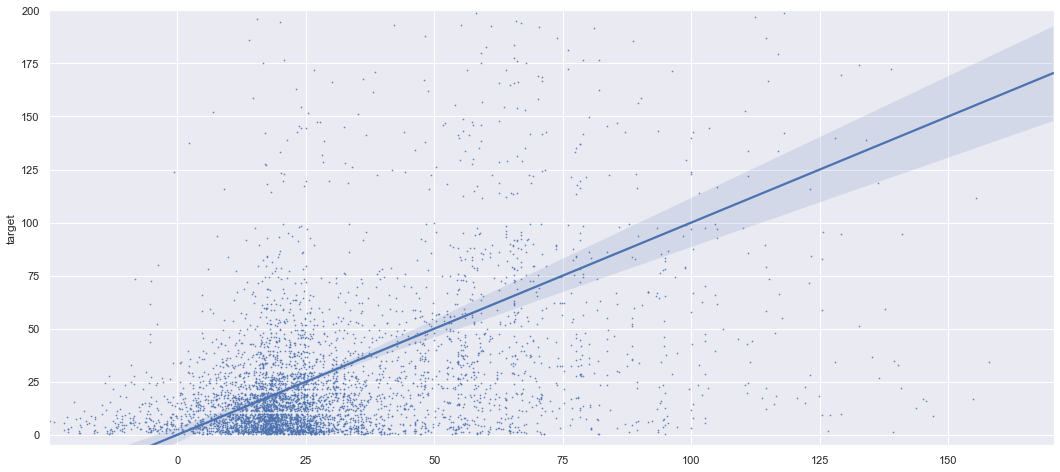

In [25]:
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

plt.rcParams["figure.figsize"] = (18,8)
plt.ylim(-5, 200)
sn.regplot(x=y_pred, y=y, scatter_kws={'s':0.5})

## Linear Regression with Logarithmic Transformation

In [26]:
X = df2[predictors + additional_predictors]
y = np.log(df2.target.values)

print('Used predictors for linear regression are:', *predictors)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg_ts = LinearRegression()
linreg_ts.fit(X_train, y_train)
y_pred = np.exp(linreg_ts.predict(X_test))

Used predictors for linear regression are: program_id program_city_group age_group gender_group service_type_id cpr_region number_of_clinics_in_progam clinic_franchise


In [27]:
print('MSE:', '{:.4f}'.format(metrics.mean_squared_error(np.exp(y_test), y_pred)))
print('RMSE:', '{:.4f}'.format(np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))))
print('MAPE:', '{:.4f}'.format(np.sqrt(metrics.mean_absolute_percentage_error(np.exp(y_test), y_pred))))

MSE: 4186.7452
RMSE: 64.7051
MAPE: 1.5174


<AxesSubplot:ylabel='target'>

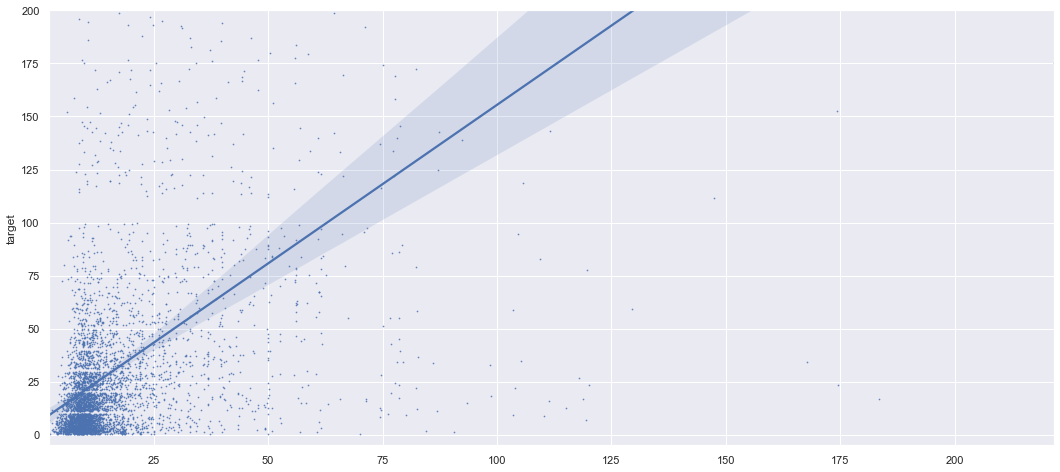

In [28]:
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = np.exp(linreg.predict(X))

plt.rcParams["figure.figsize"] = (18,8)
plt.ylim(-5, 200)
sn.regplot(x=y_pred, y=df2.target, scatter_kws={'s':0.5})